<a href="https://colab.research.google.com/github/Ravikiran-Bhonagiri/Feature-Engineering/blob/main/Audio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!sudo apt update && sudo apt upgrade

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,560 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,227 kB]
Fetched 3,916 kB in 3s (1,143 kB/s)
Reading package lists... Done
Building dependency tree... Done
Rea

In [24]:
!sudo apt install python3-pip
!pip install numpy scipy matplotlib librosa sounddevice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


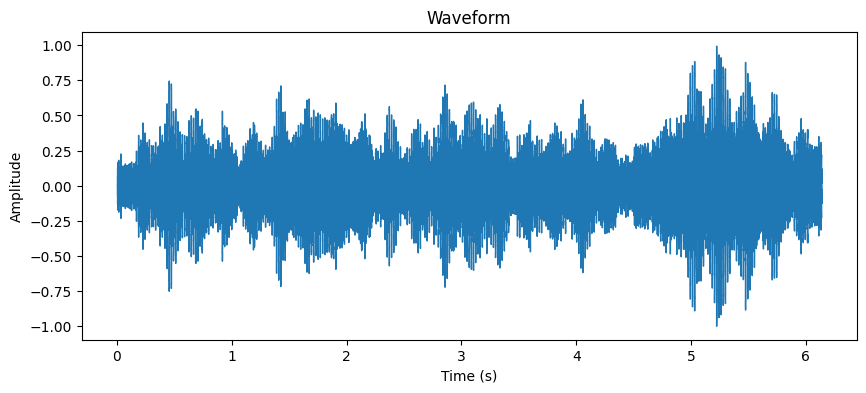

MFCC shape: (13, 265)


In [25]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = "/content/sample.wav"
y, sr = librosa.load(audio_file, sr=None)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Extract features like MFCC (Mel-Frequency Cepstral Coefficients)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print("MFCC shape:", mfccs.shape)


Sample rate (fs): 22050
Audio shape: (135288,)


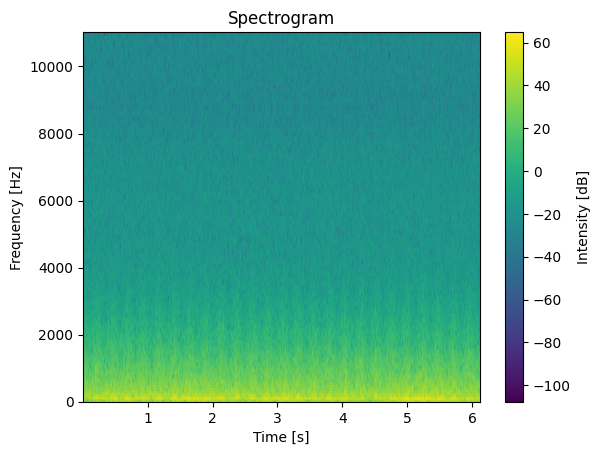

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from scipy.io import wavfile

# Load the .wav file
fs, audio = wavfile.read("/content/sample.wav")

print("Sample rate (fs):", fs)
print("Audio shape:", audio.shape)

# Compute the spectrogram
f, t, Sxx = spectrogram(audio[:], fs)

# Plot the spectrogram
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
plt.show()


# **Audio Feature Extraction for Industrial Fan Anomaly Detection**

This writeup explains the features extracted for audio analysis of **industrial fan sounds** to detect anomalies. The features are grouped into different categories: time-domain, frequency-domain, harmonic, and statistical features.

---

## **1. Zero Crossing Rate (ZCR)**  
- **Description:** ZCR represents the rate at which the signal changes its sign (crosses the zero amplitude axis).  
- **Formula:**  
  $$
  ZCR = \frac{1}{N-1} \sum_{n=1}^{N-1} \mathbb{1}(y[n] \cdot y[n-1] < 0)
  $$
  where $\mathbb{1}$ is an indicator function, and $N$ is the number of samples.
- **Use Case:** High ZCR indicates sharp transitions in the sound (e.g., percussive or noisy components), while low ZCR indicates smooth or continuous sound (e.g., hums).

---

## **2. Spectral Centroid**  
- **Description:** Represents the "center of mass" of the frequency spectrum. It indicates where the majority of the spectral energy is concentrated.
- **Formula:**  
  $$
  \text{Centroid} = \frac{\sum_{f} f \cdot S(f)}{\sum_{f} S(f)}
  $$
  where $S(f)$ is the spectral magnitude at frequency $f$.
- **Interpretation:**  
  - **Low values:** Indicate bass-heavy sounds or hums.  
  - **High values:** Indicate bright or high-pitched sounds (e.g., squeals, whistles).

---

## **3. Spectral Rolloff**  
- **Description:** The frequency below which a certain percentage (usually 85%) of the total spectral energy lies.  
- **Use Case:** Helps determine whether the sound is dominated by low or high frequencies. Anomalous fans may show shifts in rolloff due to mechanical wear.

---

## **4. Spectral Bandwidth**  
- **Description:** Measures the spread of frequencies around the spectral centroid, indicating how "wide" the frequency spectrum is.  
- **Formula:**  
  $$
  \text{Bandwidth} = \sqrt{\frac{\sum_{f} (f - \text{Centroid})^2 S(f)}{\sum_{f} S(f)}}
  $$
- **Interpretation:**  
  - **Narrow bandwidth:** Indicates pure tones (e.g., motor hum).  
  - **Wide bandwidth:** Indicates noise or mechanical failure sounds.

---

## **5. Root Mean Square (RMS) Energy**  
- **Description:** Represents the average power (energy) of the audio signal over time.  
- **Formula:**  
  $$
  \text{RMS} = \sqrt{\frac{1}{N} \sum_{n=1}^{N} y[n]^2}
  $$
  where $N$ is the number of samples, and $y[n]$ is the amplitude at sample $n$.
- **Interpretation:** Higher RMS values indicate louder sounds, while lower values indicate quieter audio.

---

## **6. Mel-Frequency Cepstral Coefficients (MFCCs)**  
- **Description:** MFCCs represent the short-term power spectrum of sound on a Mel scale, mimicking human auditory perception.  
- **Use Case:** Commonly used for speech and audio classification tasks.
- **Interpretation:**  
  - **MFCC 1:** Often corresponds to the overall energy in the signal.  
  - Higher-order MFCCs capture finer details like brightness and timbre.

---

## **7. Chroma Features (STFT)**  
- **Description:** Represents the energy distribution among 12 pitch classes (notes in the musical octave).  
- **Use Case:** Useful for detecting harmonic content.

---

## **8. Spectral Contrast**  
- **Description:** Measures the difference in amplitude between peaks (harmonic components) and valleys (noise).  
- **Interpretation:** Higher spectral contrast values indicate more dynamic sounds, while lower values indicate more uniform spectral energy.

---

## **9. Tonnetz (Tonal Centroid Features)**  
- **Description:** Represents harmonic relationships such as chords and keys.  
- **Use Case:** Useful for detecting subtle tonal shifts that may indicate mechanical imbalance or wear.

---

## **10. Onset Strength**  
- **Description:** Measures the sudden changes in energy, indicating the occurrence of transients (onsets of new events such as motor vibrations or impacts).  
- **Use Case:** Helps detect irregular impulses or impacts in fan sounds.

---

## **11. Harmonic and Percussive RMS**  
- **Description:** Separates the audio into harmonic (melodic/tonal) and percussive (rhythmic/transient) components.
  - **Harmonic RMS:** Energy of tonal components (e.g., motor hum).  
  - **Percussive RMS:** Energy of noise or impacts (e.g., rattling or knocking).

---

## **12. Pitch (Fundamental Frequency)**  
- **Description:** Represents the estimated fundamental frequency (pitch) of the sound.  
- **Use Case:** Changes in pitch may indicate worn bearings or other mechanical faults.

---

## **13. Tempo (BPM)**  
- **Description:** Represents the beats per minute (BPM) of the sound. In industrial sounds, irregular tempo or changes in periodicity may indicate anomalies.

---

## **14. Chromagram (CQT)**  
- **Description:** Similar to chroma features but uses a constant-Q transform for better resolution in detecting pitch-related changes.  
- **Use Case:** Useful for analyzing frequency shifts across different time frames.

---

## **15. Spectral Flatness**  
- **Description:** Measures how noise-like the sound is by comparing the geometric mean to the arithmetic mean of the power spectrum.  
- **Formula:**  
  $$
  \text{Spectral Flatness} = \frac{\text{Geometric Mean of } S(f)}{\text{Arithmetic Mean of } S(f)}
  $$
- **Interpretation:**  
  - **Low values:** Indicate tonal sound.  
  - **High values:** Indicate noise or broadband sound.

---

## **16. Spectral Entropy**  
- **Description:** Quantifies the randomness or complexity of the frequency spectrum.  
- **Use Case:** Anomalous sounds often have higher entropy due to irregular noise patterns.

---

## **17. Crest Factor**  
- **Description:** Ratio of the peak amplitude to the RMS value.  
- **Formula:**  
  $$
  \text{Crest Factor} = \frac{\text{Peak Amplitude}}{\text{RMS Value}}
  $$
- **Use Case:** High crest factors indicate sharp transient peaks (e.g., impacts or clanks).

---

## **18. Attack Time and Decay Time**  
- **Description:**  
  - **Attack Time:** Time taken for the signal to rise to its peak.  
  - **Decay Time:** Time taken for the signal to decay to its baseline.
- **Use Case:** Sudden increases or decreases in attack/decay times may indicate mechanical faults.

---

## **19. Skewness and Kurtosis**  
- **Description:**  
  - **Skewness:** Measures the asymmetry of the amplitude distribution.  
  - **Kurtosis:** Measures the "peakedness" of the amplitude distribution.
- **Use Case:** Helps detect deviations from normal amplitude distribution patterns caused by anomalies.

---

### **Summary:**
These features provide a comprehensive representation of the sound characteristics, capturing:
1. **Temporal changes:** Features like ZCR, RMS, and onset strength.
2. **Spectral properties:** Features like spectral centroid, bandwidth, and flatness.
3. **Harmonic vs percussive content:** Using harmonic/percussive RMS.
4. **Statistical properties:** Skewness and kurtosis help detect unusual patterns.

By combining these features, you can build robust machine learning models for detecting anomalies in industrial fan sound data.


In [28]:
import librosa
import numpy as np
import pandas as pd
from scipy.signal import hilbert

# Load the audio file
audio_file = "/content/sample.wav"
y, sr = librosa.load(audio_file, sr=None)

# Feature extraction
features = {}

# 1. Zero Crossing Rate (ZCR)
# Measures the rate at which the signal changes its sign. Higher ZCR values indicate noise or percussive sounds.
features["zcr_mean"] = np.mean(librosa.feature.zero_crossing_rate(y))

# 2. Spectral Centroid
# Represents the "center of mass" of the spectrum. Higher values indicate "brighter" or higher-pitched sounds.
features["spectral_centroid_mean"] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

# 3. Spectral Rolloff
# The frequency below which a certain percentage (usually 85%) of the total spectral energy lies.
features["spectral_rolloff_mean"] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

# 4. Spectral Bandwidth
# Measures the range of frequencies present in the audio signal, indicating how "wide" the frequency spectrum is.
features["spectral_bandwidth_mean"] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

# 5. Root Mean Square (RMS) Energy
# Represents the average power of the audio signal over time.
features["rms_mean"] = np.mean(librosa.feature.rms(y=y))

# 6. Mel-Frequency Cepstral Coefficients (MFCCs)
# Capture the overall shape of the spectral envelope, which is important for speech and music classification.
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
for i in range(13):
    features[f"mfcc_{i+1}_mean"] = np.mean(mfccs[i])

# 7. Chroma Features (STFT)
# Represents the distribution of energy among 12 different pitch classes (semitones of the musical octave).
features["chroma_mean"] = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

# 8. Spectral Contrast
# Measures the difference in energy between spectral peaks and valleys, useful for distinguishing tonal vs noisy sounds.
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
features["spectral_contrast_mean"] = np.mean(spectral_contrast)

# 9. Tonnetz (Tonal Centroid Features)
# Represents harmonic relations, such as intervals, chords, and keys, capturing tonal information from the signal.
tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
features["tonnetz_mean"] = np.mean(tonnetz)

# 10. Onset Strength
# Measures sudden changes in energy, indicating transients or "onsets" (i.e., the beginnings of beats).
onset_strength = librosa.onset.onset_strength(y=y, sr=sr)
features["onset_strength_mean"] = np.mean(onset_strength)

# 11. Harmonic and Percussive RMS
# Separates the audio into harmonic (melodic) and percussive (beat-like) components.
harmonic, percussive = librosa.effects.hpss(y)
features["harmonic_rms"] = np.mean(librosa.feature.rms(y=harmonic))  # Energy of the harmonic component
features["percussive_rms"] = np.mean(librosa.feature.rms(y=percussive))  # Energy of the percussive component

# 12. Pitch (Fundamental Frequency)
# Estimates the fundamental frequency (pitch) of the signal.
f0, _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
features["mean_pitch"] = np.nanmean(f0) if np.nanmean(f0) is not np.nan else 0

# 13. Tempo (BPM)
# Estimates the overall tempo of the audio in beats per minute (BPM).
tempo = librosa.beat.tempo(y=y, sr=sr)[0]
features["tempo"] = tempo

# 14. Chromagram from Constant-Q Transform (CQT)
# Similar to chroma features but uses a constant-Q transform for better pitch resolution.
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
features["chroma_cqt_mean"] = np.mean(chroma_cqt)

# 15. Spectral Flatness
# Indicates how noise-like the sound is.
features["spectral_flatness_mean"] = np.mean(librosa.feature.spectral_flatness(y=y))

# 16. Spectral Entropy
# Quantifies the randomness or complexity of the spectrum.
def spectral_entropy(audio_signal, num_bins=10):
    power_spectrum = np.abs(np.fft.fft(audio_signal))**2
    histogram, _ = np.histogram(power_spectrum, bins=num_bins, density=True)
    entropy = -np.sum(histogram * np.log2(histogram + 1e-10))
    return entropy

features["spectral_entropy"] = spectral_entropy(y)

# 17. Crest Factor
# Ratio of the peak amplitude to the RMS value. High values indicate sharp peaks.
features["crest_factor"] = np.max(np.abs(y)) / features["rms_mean"]

# 18. Attack Time and Decay Time
# Represents how quickly the sound rises (attack) and how quickly it fades (decay).
def envelope_slope(y, sr):
    analytic_signal = hilbert(y)
    amplitude_envelope = np.abs(analytic_signal)
    attack = np.argmax(amplitude_envelope > 0.5 * np.max(amplitude_envelope)) / sr
    decay = (len(y) - np.argmax(amplitude_envelope[::-1] > 0.5 * np.max(amplitude_envelope))) / sr
    return attack, decay

attack_time, decay_time = envelope_slope(y, sr)
features["attack_time"] = attack_time
features["decay_time"] = decay_time

# 19. Skewness and Kurtosis
# Measures the asymmetry (skewness) and "peakedness" (kurtosis) of the audio signal's amplitude distribution.
from scipy.stats import skew, kurtosis
features["skewness"] = skew(y)
features["kurtosis"] = kurtosis(y)

# Convert features to a single vector
feature_vector = np.array(list(features.values()))

# Create a DataFrame and save to CSV
df_features = pd.DataFrame([features])
df_features.to_csv("complete_audio_features.csv", index=False)

print("Extracted Features with Descriptions:")
for key, value in features.items():
    print(f"{key}: {value}")


<ipython-input-28-b01e6a55769e>:71: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)[0]


Extracted Features with Descriptions:
zcr_mean: 0.010419737617924528
spectral_centroid_mean: 381.10888958474186
spectral_rolloff_mean: 685.2434035966982
spectral_bandwidth_mean: 755.287949309681
rms_mean: 0.20232313871383667
mfcc_1_mean: -253.77157592773438
mfcc_2_mean: 215.2281036376953
mfcc_3_mean: 35.89529800415039
mfcc_4_mean: -1.6330393552780151
mfcc_5_mean: 22.943153381347656
mfcc_6_mean: 16.03629493713379
mfcc_7_mean: 9.25137996673584
mfcc_8_mean: 12.201786994934082
mfcc_9_mean: 7.256198406219482
mfcc_10_mean: 3.9605777263641357
mfcc_11_mean: 5.097224712371826
mfcc_12_mean: 4.064612865447998
mfcc_13_mean: 2.9772896766662598
chroma_mean: 0.46726587414741516
spectral_contrast_mean: 15.603989700525199
tonnetz_mean: -0.05030820061747254
onset_strength_mean: 0.7603074312210083
harmonic_rms: 0.18571847677230835
percussive_rms: 0.03160266578197479
mean_pitch: 67.43609915709956
tempo: 123.046875
chroma_cqt_mean: 0.21990640461444855
spectral_flatness_mean: 3.055750494240783e-05
spectral_

# **Key Audio Features for Industrial Fan Noise Analysis**

When analyzing the noise generated by industrial fans, some audio features are more crucial for detecting anomalies (e.g., wear and tear, loose components, mechanical faults). Below is an **ordered list of features** based on their significance for fan noise analysis, along with explanations for their importance.

---

## **1. Spectral Centroid**
- **Reason:**
  - The spectral centroid indicates where the majority of the frequency energy is concentrated.
  - Abnormal fan sounds often have an upward or downward shift in the centroid due to mechanical wear, broken blades, or imbalance.
- **Focus:** Monitor sudden increases or decreases, as these indicate changes in the frequency profile.

---

## **2. Spectral Rolloff**
- **Reason:**
  - Spectral rolloff measures the point below which 85% of the spectral energy resides.
  - Changes in rolloff indicate whether the fan is producing higher-pitched (e.g., squealing) or lower-pitched (e.g., humming) noise.
- **Focus:** Track for significant shifts toward higher frequencies (suggesting squeaks) or lower frequencies (suggesting slowed or unbalanced motion).

---

## **3. Spectral Bandwidth**
- **Reason:**
  - Spectral bandwidth captures how spread out the frequencies are around the centroid.
  - A narrow bandwidth typically indicates a pure, steady hum, while a wider bandwidth suggests noisy, rattling, or turbulent sounds.
- **Focus:** Anomalies usually cause the bandwidth to widen due to mechanical irregularities.

---

## **4. Root Mean Square (RMS) Energy**
- **Reason:**
  - RMS energy reflects the overall loudness or power of the sound.
  - Fans operating with mechanical faults often have increased or irregular RMS due to vibrations, impacts, or loose components.
- **Focus:** Sudden spikes or consistent increases in RMS energy can indicate abnormal operations.

---

## **5. Harmonic and Percussive RMS**
- **Reason:**
  - The harmonic RMS captures smooth, tonal sounds, while the percussive RMS captures transient, noise-like sounds.
  - Changes in the ratio between harmonic and percussive energy can indicate a shift from normal operation (smooth hum) to abnormal operation (clicking, knocking, or grinding).
- **Focus:** Higher percussive RMS relative to harmonic RMS suggests mechanical impacts or loose parts.

---

## **6. Zero Crossing Rate (ZCR)**
- **Reason:**
  - ZCR measures the rate of sign changes in the waveform.
  - High ZCR values indicate rapid oscillations or noise-like transients, which are typical of squeaks or other sharp, mechanical sounds.
- **Focus:** Track for higher-than-usual ZCR values, which may indicate increased turbulence or faulty fan components.

---

## **7. Spectral Flatness**
- **Reason:**
  - Spectral flatness indicates how noise-like the sound is.
  - Abnormal fan noises, such as rattling or grinding, tend to increase spectral flatness because they add broadband noise to the spectrum.
- **Focus:** An increase in spectral flatness is often correlated with more chaotic or noisy sounds.

---

## **8. Pitch (Fundamental Frequency)**
- **Reason:**
  - The fundamental frequency reflects the base "hum" of the fan motor.
  - Shifts in pitch may indicate a change in the motor speed or an issue with the fan blades.
- **Focus:** Watch for sudden drops or rises in pitch, which may correspond to mechanical strain or failures.

---

## **9. Spectral Contrast**
- **Reason:**
  - Spectral contrast measures the difference between spectral peaks and valleys.
  - Fans operating normally have consistent harmonic peaks; irregular peaks and valleys suggest the introduction of noisy components or wear.
- **Focus:** Significant changes in contrast patterns could indicate rubbing or friction between parts.

---

## **10. Attack Time and Decay Time**
- **Reason:**
  - Attack time measures how quickly the sound reaches its peak, while decay time measures how long it takes for the sound to return to baseline.
  - Changes in attack and decay times can indicate mechanical instability (e.g., loose or misaligned parts).
- **Focus:** Track increased attack and decay times for clues about sudden changes in airflow or mechanical delays.

---

## **11. Skewness and Kurtosis**
- **Reason:**
  - Skewness indicates the asymmetry of the amplitude distribution, while kurtosis measures the "peakedness."
  - A sudden increase in skewness may indicate an increase in sharp, high-energy transients (e.g., clicking or snapping sounds).
  - High kurtosis often corresponds to impulsive sounds caused by impacts or loose components.
- **Focus:** Large deviations from normal values may indicate erratic behavior or impacts.

---

## **12. Tempo (BPM)**
- **Reason:**
  - Tempo reflects the periodicity of recurring events.
  - In a fan, consistent tempo corresponds to regular cycles of motion. Sudden changes may indicate speed fluctuations or faulty components.
- **Focus:** Irregular tempo can indicate blade issues or interruptions in motor speed.

---

## **Summary of Focus Points:**
- **Frequency-based features:** Spectral centroid, rolloff, and bandwidth are key indicators of fan noise anomalies.
- **Energy-based features:** RMS, harmonic/percussive RMS, and spectral flatness indicate loudness changes and the presence of noise-like components.
- **Temporal features:** Onset strength, attack/decay time, and skewness/kurtosis capture transient events and mechanical impacts.

By prioritizing these features in your analysis, you can detect early warning signs of fan degradation or failure.


In [38]:
import librosa
import numpy as np
import pandas as pd
from scipy.signal import hilbert
from scipy.stats import skew, kurtosis

def extract_audio_features(audio_file):
    """
    Extract audio features from the input audio file.

    Parameters:
        audio_file (str): Path to the audio file.

    Returns:
        dict: Dictionary of extracted audio features.
    """
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Feature extraction
    features = {}

    # 1. Zero Crossing Rate (ZCR)
    features["zcr_mean"] = np.mean(librosa.feature.zero_crossing_rate(y))

    # 2. Spectral Centroid
    features["spectral_centroid_mean"] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    # 3. Spectral Rolloff
    features["spectral_rolloff_mean"] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # 4. Spectral Bandwidth
    features["spectral_bandwidth_mean"] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    # 5. Root Mean Square (RMS) Energy
    features["rms_mean"] = np.mean(librosa.feature.rms(y=y))

    # 6. Mel-Frequency Cepstral Coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i in range(13):
        features[f"mfcc_{i+1}_mean"] = np.mean(mfccs[i])

    # 7. Chroma Features (STFT)
    features["chroma_mean"] = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

    # 8. Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    features["spectral_contrast_mean"] = np.mean(spectral_contrast)

    # 9. Tonnetz (Tonal Centroid Features)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
    features["tonnetz_mean"] = np.mean(tonnetz)

    # 10. Onset Strength
    onset_strength = librosa.onset.onset_strength(y=y, sr=sr)
    features["onset_strength_mean"] = np.mean(onset_strength)

    # 11. Harmonic and Percussive RMS
    harmonic, percussive = librosa.effects.hpss(y)
    features["harmonic_rms"] = np.mean(librosa.feature.rms(y=harmonic))
    features["percussive_rms"] = np.mean(librosa.feature.rms(y=percussive))

    # 12. Pitch (Fundamental Frequency)
    f0, _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    features["mean_pitch"] = np.nanmean(f0) if np.nanmean(f0) is not np.nan else 0

    # 13. Tempo (BPM)
    tempo = librosa.feature.rhythm.tempo(y=y, sr=sr)[0]  # Updated for newer versions of librosa
    features["tempo"] = tempo

    # 14. Chromagram from Constant-Q Transform (CQT)
    chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
    features["chroma_cqt_mean"] = np.mean(chroma_cqt)

    # 15. Spectral Flatness
    features["spectral_flatness_mean"] = np.mean(librosa.feature.spectral_flatness(y=y))

    # 16. Spectral Entropy
    def spectral_entropy(audio_signal, num_bins=10):
        power_spectrum = np.abs(np.fft.fft(audio_signal)) ** 2
        histogram, _ = np.histogram(power_spectrum, bins=num_bins, density=True)
        entropy = -np.sum(histogram * np.log2(histogram + 1e-10))
        return entropy

    features["spectral_entropy"] = spectral_entropy(y)

    # 17. Crest Factor
    features["crest_factor"] = np.max(np.abs(y)) / features["rms_mean"]

    # 18. Attack Time and Decay Time
    def envelope_slope(y, sr):
        analytic_signal = hilbert(y)
        amplitude_envelope = np.abs(analytic_signal)
        attack = np.argmax(amplitude_envelope > 0.5 * np.max(amplitude_envelope)) / sr
        decay = (len(y) - np.argmax(amplitude_envelope[::-1] > 0.5 * np.max(amplitude_envelope))) / sr
        return attack, decay

    attack_time, decay_time = envelope_slope(y, sr)
    features["attack_time"] = attack_time
    features["decay_time"] = decay_time

    # 19. Skewness and Kurtosis
    features["skewness"] = skew(y)
    features["kurtosis"] = kurtosis(y)

    return features

In [39]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import os

directory_path = "/content/drive/MyDrive/almIT_Anamoly_Audios"

# List all .wav files
if os.path.exists(directory_path):
    wav_files = [f"{directory_path}/{f}" for f in os.listdir(directory_path) if f.endswith('.wav')]
    print("Found .wav files:", wav_files)
else:
    print(f"Directory not found: {directory_path}")

Found .wav files: ['/content/drive/MyDrive/almIT_Anamoly_Audios/OnState1.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OffState1.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/Normal1.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OnState2.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OffState2.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/Normal2.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OnState3.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/Normal3.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OffState3.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OnState4.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/Normal4.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OffState4.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OnState5.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/Normal5.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OffState5.wav', '/content/drive/MyDrive/almIT_Anamoly_Audios/OnState6.wav', '/content/drive/MyDri

In [41]:
final_audio_features = []

for audio_file in wav_files:
    audio_features = extract_audio_features(audio_file)
    audio_features["audio_file"] = audio_file
    final_audio_features.append(audio_features)
    print(f"Extracted features from {audio_file}")

# Optionally, save features to CSV
df_features = pd.DataFrame(final_audio_features)
df_features.to_csv("/content/audio_features.csv", index=False)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=762
  warnings.warn(


Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState1.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState1.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal1.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState2.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState2.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal2.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState3.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal3.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState3.wav


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1009
  warnings.warn(


Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState4.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal4.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState4.wav


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=971
  warnings.warn(


Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState5.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal5.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState5.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState6.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal6.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState6.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState7.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal7.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState7.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState8.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal8.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState8.wav
Extracted features from /con

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=952
  warnings.warn(


Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState9.wav


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1009
  warnings.warn(


Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState10.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal10.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState10.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OnState11.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Normal11.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/OffState11.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Paper1.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Paper2.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Paper3.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Paper4.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/Paper5.wav
Extracted features from /content

<ipython-input-38-c2b5471f1c97>:65: RuntimeWarning: Mean of empty slice
  features["mean_pitch"] = np.nanmean(f0) if np.nanmean(f0) is not np.nan else 0


Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/solidsound8.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/solidsound9.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/solidsound10.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/solidsound11.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/solidsound12.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/solidsound14.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/solidsound15.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/boltsound11.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/boltsound12.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/boltsound13.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/boltsound14.wav
Extracted features from /content/drive/MyDrive/almIT_Anamoly_Audios/bol